In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from datenspende.utils import query_ch_df, query_pg_df
import datetime
from datetime import date
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import re
import os
import glob
from functools import reduce

In [2]:
extcoh_uid = np.load('extcoh(1).npy')

In [3]:
clean = []
csex = []
cage = []
cdf = []

path = os.getcwd()+'/user_epoch/'
csv_files = glob.glob(os.path.join(path, "*.csv"))
for f in csv_files:
    
    uid = int(f.split("/")[-1].split('.')[1][1:])
    
    if uid in extcoh_uid:
        df = pd.read_csv(f, index_col = 0)
        if len(df['phase'].unique()) >= 4 : #and 0 in df['phase'].unique() and 1 in df['phase'].unique()
            if np.all([np.count_nonzero(df[df['phase']==ph]['hr'].notna()) > 100 for ph in df['phase'].unique()]):

                cdf.append(df)
                demo_info = f.split("/")[-1].split('.')[0]
                csex.append(re.split('(\d+)',demo_info)[0])
                cage.append(int(re.split('(\d+)',demo_info)[1]))
                clean.append(int(f.split("/")[-1].split('.')[1][1:])) 

path = os.getcwd()+'/u_shb/'
csv_files = glob.glob(os.path.join(path, "*.csv"))
for f in csv_files:
    
    uid = int(f.split("/")[-1].split('.')[1][1:])
    
    if uid in extcoh_uid:
        df = pd.read_csv(f, index_col = 0)
        if len(df['phase'].unique()) >= 4 : #and 0 in df['phase'].unique() and 1 in df['phase'].unique()
            if np.all([np.count_nonzero(df[df['phase']==ph]['hr'].notna()) > 100 for ph in df['phase'].unique()]):

                cdf.append(df)
                demo_info = f.split("/")[-1].split('.')[0]
                csex.append(re.split('(\d+)',demo_info)[0])
                cage.append(int(re.split('(\d+)',demo_info)[1]))
                clean.append(int(f.split("/")[-1].split('.')[1][1:])) 
    
path = os.getcwd()+'/u_fat/'
csv_files = glob.glob(os.path.join(path, "*.csv"))
for f in csv_files:
    
    uid = int(f.split("/")[-1].split('.')[1][1:])
    
    if uid in extcoh_uid:
        df = pd.read_csv(f, index_col = 0)
        if len(df['phase'].unique()) >= 4 : #and 0 in df['phase'].unique() and 1 in df['phase'].unique()
            if np.all([np.count_nonzero(df[df['phase']==ph]['hr'].notna()) > 100 for ph in df['phase'].unique()]):

                cdf.append(df)
                demo_info = f.split("/")[-1].split('.')[0]
                csex.append(re.split('(\d+)',demo_info)[0])
                cage.append(int(re.split('(\d+)',demo_info)[1]))
                clean.append(int(f.split("/")[-1].split('.')[1][1:])) 
    
path = os.getcwd()+'/extcoh/'
csv_files = glob.glob(os.path.join(path, "*.csv"))
for f in csv_files:
    
    uid = int(f.split("/")[-1].split('.')[1][1:])
    
    if uid in extcoh_uid:
        df = pd.read_csv(f, index_col = 0)
        if len(df['phase'].unique()) >= 4 : #and 0 in df['phase'].unique() and 1 in df['phase'].unique()
            if np.all([np.count_nonzero(df[df['phase']==ph]['hr'].notna()) > 100 for ph in df['phase'].unique()]):

                cdf.append(df)
                demo_info = f.split("/")[-1].split('.')[0]
                csex.append(re.split('(\d+)',demo_info)[0])
                cage.append(int(re.split('(\d+)',demo_info)[1]))
                clean.append(int(f.split("/")[-1].split('.')[1][1:])) 

In [4]:
perss_user = pd.DataFrame(data =  np.array([clean, csex, cage]).T,columns = ['uid', 'sex', 'age'])

In [5]:
path = os.getcwd()+'/match_c/'
csv_files = glob.glob(os.path.join(path, "*.csv"))

mclean = []
mcsex = []
mcage = []
mcdf = []
for f in csv_files:
      
    # read the csv file
    df = pd.read_csv(f, index_col = 0)
    if len(df['phase'].unique()) >= 4: #and 0 in df['phase'].unique() and 1 in df['phase'].unique():
        if np.all([np.count_nonzero(df[df['phase']==ph]['hr'].notna()) > 100 for ph in df['phase'].unique()]):
                
            mcdf.append(df)
            demo_info = f.split("/")[-1].split('.')[0]

            mclean.append(int(f.split("/")[-1].split('.')[1][1:]))  
            mcsex.append(re.split('(\d+)',demo_info)[0])
            mcage.append(int(re.split('(\d+)',demo_info)[1]))
             
                #df.to_csv('match_c_clean/'+demo_info+'.'+f.split("/")[-1].split('.')[1][1:]+'.csv')

In [6]:

match_user = pd.DataFrame(data =  np.array([mclean, mcsex, mcage]).T,columns = ['uid', 'sex', 'age'])

perss_user['c'] = 1
match_user['c'] = 1

In [7]:
#perss_user.groupby(['sex','age']).sum()*3

In [8]:
#match_user.groupby(['sex','age']).sum()

In [9]:
csex.pop(99)
cage.pop(99)
cdf.pop(99)

,start,hr,source,id,rhr,sleep,steps,date,day_of_week,weekend,dt,day_totest,week_totest,phase,% of MHR
0,2021-03-10 07:00:00,60.000000,6.0,183534.0,NaN,NaN,124.000000,2021-03-10,2,False,2021-12-09,-274 days,-39,0,31.039834
1,2021-03-10 07:15:00,82.000000,6.0,183534.0,NaN,NaN,16.000000,2021-03-10,2,False,2021-12-09,-274 days,-39,0,42.421107
2,2021-03-10 07:30:00,84.000000,6.0,183534.0,NaN,NaN,108.885387,2021-03-10,2,False,2021-12-09,-274 days,-39,0,43.455768
3,2021-03-10 07:45:00,81.666667,6.0,183534.0,NaN,NaN,151.114613,2021-03-10,2,False,2021-12-09,-274 days,-39,0,42.248664
4,2021-03-10 08:00:00,87.500000,6.0,183534.0,80.0,NaN,19.000000,2021-03-10,2,False,2021-12-09,-274 days,-39,0,45.266425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61729,2022-12-13 05:15:00,NaN,NaN,NaN,NaN,NaN,0.000000,2022-12-13,1,False,2021-12-09,369 days,53,3,NaN
61730,2022-12-13 05:30:00,NaN,NaN,NaN,NaN,NaN,0.000000,2022-12-13,1,False,2021-12-09,369 days,53,3,NaN
61731,2022-12-13 05:45:00,NaN,NaN,NaN,NaN,NaN,105.000000,2022-12-13,1,False,2021-12-09,369 days,53,3,NaN
61732,2022-12-13 06:00:00,NaN,NaN,NaN,NaN,NaN,0.000000,2022-12-13,1,False,2021-12-09,369 days,53,3,NaN


In [10]:
perss_user = perss_user.drop(99)

In [11]:
np.random.seed(2)
matched_idx = []
used = []
for p in range(len(perss_user.groupby(by=['age','sex']).sum())):
     
    val = perss_user.groupby(by=['age','sex']).sum().values[p][0]
    age = perss_user.groupby(by=['age','sex']).sum().index[p][0]
    sex = perss_user.groupby(by=['age','sex']).sum().index[p][1]
    mid = np.random.choice(match_user[(match_user.sex == sex)&(match_user.age == age)&(~match_user.uid.isin(used))].index,val * 3,replace=False)
    for i in match_user[match_user.index.isin(mid)].uid.values:
        used.append(i)
    for i in mid:
        matched_idx.append(i)

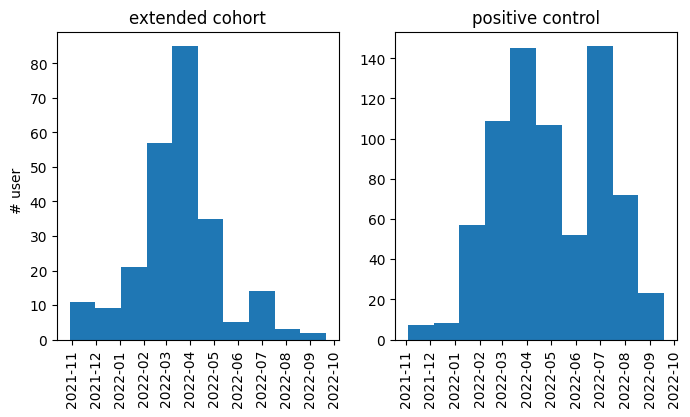

In [12]:
testdates = []
for i in cdf:
    testdates.append(pd.to_datetime(i.dt.iloc[0]).date())
testdatesc = []
for i in matched_idx:
    testdatesc.append(pd.to_datetime(mcdf[i].dt.iloc[0]).date())
#n, bins = np.histogram(testdates)
fig, ax = plt.subplots(1,2,figsize=(8,4))
ax[0].hist(testdates)
ax[1].hist(testdatesc)
ax[0].tick_params(axis='x', rotation=90)
ax[1].tick_params(axis='x', rotation=90)
ax[0].set_title('extended cohort')
ax[1].set_title('positive control')
ax[0].set_ylabel('# user  ');

In [ ]:
info = perss_user.copy()
bins = np.linspace(0, 100, 10)
info['age'] = info['age'].astype(int)
nm, _ = np.histogram(info[info['sex'] == 'male']['age'],bins=bins)
nf, _ = np.histogram(info[info['sex'] == 'female']['age'],bins=bins)
nd, _ = np.histogram(info[info['sex'] == 'nd']['age'],bins=bins)
plt.stairs(nm/len(info ),bins  , fill = False)
plt.stairs(nf/len(info ),bins  , fill = False)
plt.stairs(nd/len(info ),bins  , fill = False)
#plt.hist(info[info['sex'] == 'male']['age'],bins=bins,histtype='step')
#plt.hist(info[info['sex'] == 'female']['age'], bins = bins,histtype='step')
#plt.hist(info[info['sex'] == 'nd']['age'], bins = bins,histtype='step')
plt.ylabel('relative frequency of user')
plt.xlabel('age [y]')
plt.legend(['male', 'female', 'not defined']);

## RHR

In [13]:
seas = pd.read_csv('mean_rhr_pdps.csv',index_col=0)

In [14]:
def sliding_window(elements, window_size):
    wi_days = []
    for i in range(1,len(elements)+1):
        if i >= window_size:
            wi_days.append(elements[i-window_size:i])
        elif i < window_size:
            wi_days.append(elements[:i])
    return wi_days

In [15]:
def get_rhr(subd):
    subd = subd.copy()
    subd['start'] = pd.to_datetime(subd['start'])
    subd = subd[subd['start'].notna()]
    if len(subd.dropna()) > 0:
 
        rhr_rel = subd['rhr_cl'].dropna()
        night = subd[(subd['start'].dt.time < pd.to_datetime('07:00:00').time())&((subd['steps'].isna())|(subd['steps']==0))]['hr_cl'].dropna()
        day = subd[(subd['start'].dt.time >= pd.to_datetime('07:00:00').time())&((subd['steps'].notna())&(subd['steps']!=0))]['hr_cl'].dropna()
        day_rest = subd[(subd['start'].dt.time >= pd.to_datetime('07:00:00').time())&((subd['steps'].isna())|(subd['steps']==0))]['hr_cl'].dropna()
         
        if len(rhr_rel ) >= 20  :
            return  rhr_rel.mean(), day.mean(), night.mean(), day_rest.mean()
        else:
            return 0,0,0,0
    else:
        return 0,0,0,0

In [ ]:
lcu_rhr_mean = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(cdf)))
lcu_day_mean = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(cdf)))
lcu_night_mean = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(cdf)))
lcu_dayr_mean = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(cdf))) 
lcu_diff = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(cdf))) 
i =0
for ui in range(len(cdf)):# np.where(s_i & a_i)[0]:
    df = cdf[ui].copy()
    df = df[(pd.to_timedelta(df.day_totest).dt.days >= -62) &(pd.to_timedelta(df.day_totest).dt.days <= 180)]
    df['dt'] = pd.to_datetime(df['dt'])
    df['date'] = pd.to_datetime(df['date'])
    df['day_totest'] = df['date'] - df['dt']
    df = df.sort_values(by='date')
    mis_row = []
    for dt in [d for d in pd.date_range(start = df['date'].min(), end = df['date'].max()).difference(df.index) if d not in df['date'].unique()]:
        mis_row.append([
            np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, dt, np.nan, np.nan, np.nan, dt - df['dt'].unique()[0], np.nan, np.nan, np.nan])
    if len(mis_row) > 0:
        df = df.append(pd.DataFrame(data=mis_row, columns=df.columns))
    
    sc = df.source[df.source.notna()].iloc[0]
    seas_sc = seas[seas.source == sc].copy()
    seas_sc['date'] = pd.to_datetime(seas_sc['date'])
    df = df[['start','rhr','hr','steps','date','day_of_week', 'dt','day_totest', 'week_totest','phase']]
    df_seas = pd.merge(df,seas_sc, how = 'outer', on ='date')
    #df_seas = df_seas.dropna()
    df_seas['rhr_cl'] = df_seas['rhr'] - df_seas['mean']
    df_seas['hr_cl'] = df_seas['hr'] - df_seas['mean']
    #df['day_totest'] = df['date'] - df['dt']
    
    
    wi_list = sliding_window(df['date'].unique(),7)
    dtt_list = sliding_window(df['day_totest'].unique(),7)
    for wi in range(len(wi_list)):
        rhrm, daym, nightm, dayrm = get_rhr(df_seas[df_seas['date'].isin(wi_list[wi])])
        lcu_rhr_mean.loc[lcu_rhr_mean.index.isin(dtt_list[wi]),i] =  rhrm
        lcu_day_mean.loc[lcu_day_mean.index.isin(dtt_list[wi]),i] =  daym
        lcu_dayr_mean.loc[lcu_dayr_mean.index.isin(dtt_list[wi]),i] =  dayrm
        lcu_night_mean.loc[lcu_night_mean.index.isin(dtt_list[wi]),i] =  nightm
        if dayrm != 0 and nightm != 0:
            lcu_diff.loc[lcu_diff.index.isin(dtt_list[wi]),i] =  dayrm - nightm
            
         
    i += 1

In [16]:
mu_rhr_mean = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(matched_idx)))
mu_day_mean = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(matched_idx)))
mu_dayr_mean = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(matched_idx)))
mu_night_mean = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(matched_idx)))
mu_diff = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(matched_idx)))
 
i =0
for ui in matched_idx:# np.where(s_i & a_i)[0]:
    df = mcdf[ui].copy()
    df = df[(pd.to_timedelta(df.day_totest).dt.days >= -62) &(pd.to_timedelta(df.day_totest).dt.days <= 180)]
    df['dt'] = pd.to_datetime(df['dt'])
    df['date'] = pd.to_datetime(df['date'])
    df['day_totest'] = df['date'] - df['dt']
    df = df.sort_values(by='date')
    mis_row = []
    for dt in [d for d in pd.date_range(start = df['date'].min(), end = df['date'].max()).difference(df.index) if d not in df['date'].unique()]:
        mis_row.append([
            np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, dt, np.nan, np.nan, np.nan, dt - df['dt'].unique()[0], np.nan, np.nan, np.nan])
    if len(mis_row) > 0:
        df = df.append(pd.DataFrame(data=mis_row, columns=df.columns))
    
    sc = df.source[df.source.notna()].iloc[0]
    seas_sc = seas[seas.source == sc].copy()
    seas_sc['date'] = pd.to_datetime(seas_sc['date'])
    df = df[['start','rhr','hr','steps','date','day_of_week', 'dt','day_totest', 'week_totest','phase']]
    df_seas = pd.merge(df,seas_sc, how = 'outer', on ='date')
    #df_seas = df_seas.dropna()
    df_seas['rhr_cl'] = df_seas['rhr'] - df_seas['mean']
    df_seas['hr_cl'] = df_seas['hr'] - df_seas['mean']
    #df['day_totest'] = df['date'] - df['dt']
    
    
    wi_list = sliding_window(df['date'].unique(),7)
    dtt_list = sliding_window(df['day_totest'].unique(),7)
    for wi in range(len(wi_list)):
        rhrm, daym, nightm, dayrm = get_rhr(df_seas[df_seas['date'].isin(wi_list[wi])])
        mu_rhr_mean.loc[mu_rhr_mean.index.isin(dtt_list[wi]),i] =  rhrm
        mu_day_mean.loc[mu_day_mean.index.isin(dtt_list[wi]),i] =  daym
        mu_dayr_mean.loc[mu_dayr_mean.index.isin(dtt_list[wi]),i] =  dayrm
        mu_night_mean.loc[mu_night_mean.index.isin(dtt_list[wi]),i] =  nightm
        if dayrm != 0 and nightm != 0:
            mu_diff.loc[mu_diff.index.isin(dtt_list[wi]),i] =  dayrm - nightm
         
    i += 1

In [18]:
mu_rhr_mean.to_csv('tmp_lcu_ext/murhr.csv')
mu_day_mean.to_csv('tmp_lcu_ext/muday.csv')
mu_dayr_mean.to_csv('tmp_lcu_ext/mudayr.csv')
mu_night_mean.to_csv('tmp_lcu_ext/munight.csv')
mu_diff.to_csv('tmp_lcu_ext/mudiff.csv')

In [19]:
lcu_rhr_mean = pd.read_csv('tmp_lcu_ext/lcurhr.csv',index_col=0)
lcu_day_mean = pd.read_csv('tmp_lcu_ext/lcuday.csv',index_col=0)
lcu_dayr_mean = pd.read_csv('tmp_lcu_ext/lcudayr.csv',index_col=0)
lcu_night_mean = pd.read_csv('tmp_lcu_ext/lcunight.csv',index_col=0)
#lcu_diff_mean = pd.read_csv('tmp_lcu_ext/lcudiff.csv',index_col=0)

In [21]:
lcu_rhr_mean = lcu_rhr_mean.replace(0,np.nan)
 
mu_rhr_mean = mu_rhr_mean.replace(0,np.nan)

lcu_day_mean = lcu_day_mean.replace(0,np.nan)
 
mu_day_mean = mu_day_mean.replace(0,np.nan)

lcu_dayr_mean = lcu_dayr_mean.replace(0,np.nan)
 
mu_dayr_mean = mu_dayr_mean.replace(0,np.nan)

#lcu_diff = lcu_diff.replace(0,np.nan)
 
mu_diff = mu_diff.replace(0,np.nan)

lcu_night_mean = lcu_night_mean.replace(0,np.nan)
 
mu_night_mean = mu_night_mean.replace(0,np.nan)

In [22]:
#lcu_rhr_mean.to_csv('tmp_lcu_ext/lcurhr.csv')
#lcu_day_mean.to_csv('tmp_lcu_ext/lcuday.csv')
#lcu_dayr_mean.to_csv('tmp_lcu_ext/lcudayr.csv')
#lcu_night_mean.to_csv('tmp_lcu_ext/lcunight.csv')
#lcu_diff_mean.to_csv('tmp_lcu_ext/lcudiff.csv')

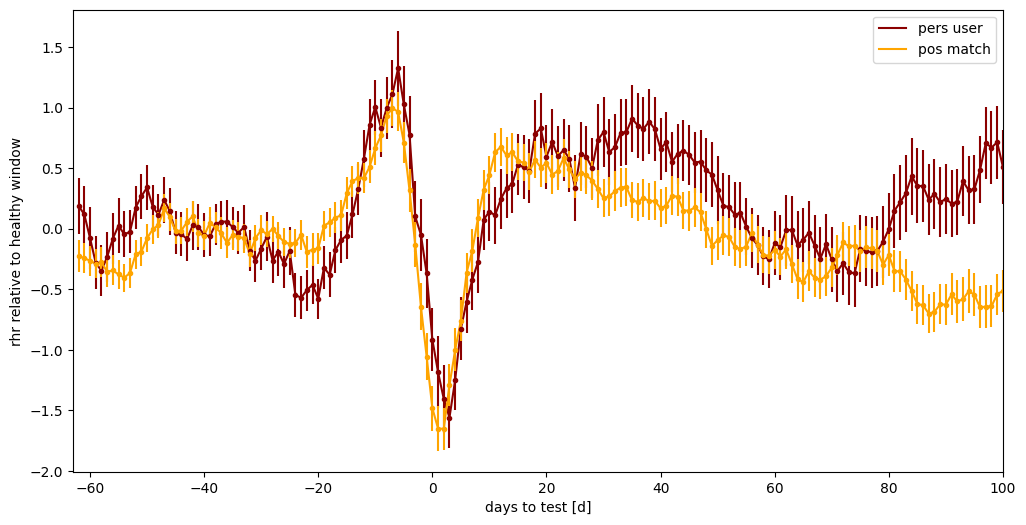

In [25]:
lcu_rhr_mean.index = pd.to_timedelta(lcu_rhr_mean.index)
data_lc = lcu_rhr_mean - lcu_rhr_mean[lcu_rhr_mean.index < pd.Timedelta(days=-7)].mean()
data_pos = mu_rhr_mean - mu_rhr_mean[mu_rhr_mean.index < pd.Timedelta(days=-7)].mean()
 
plt.figure(figsize=(12,6))
plt.plot(data_lc.index.days,data_lc.mean(axis=1),c='darkred')
plt.plot(data_pos.index.days,data_pos.mean(axis=1),c='orange')
 
#plt.ylim(-4,3)
plt.xlim(-63,100)
plt.errorbar(data_lc.index.days,data_lc.mean(axis=1),yerr = data_lc.std(axis=1)/np.sqrt(data_lc.notna().sum(axis=1).values),c='darkred', fmt=".")
plt.errorbar(data_pos.index.days,data_pos.mean(axis=1),yerr = data_pos.std(axis=1)/np.sqrt(data_pos.notna().sum(axis=1).values),c='orange', fmt=".")
 
plt.xlabel('days to test [d]')
plt.ylabel('rhr relative to healthy window')
plt.legend(['pers user', 'pos match' ]);

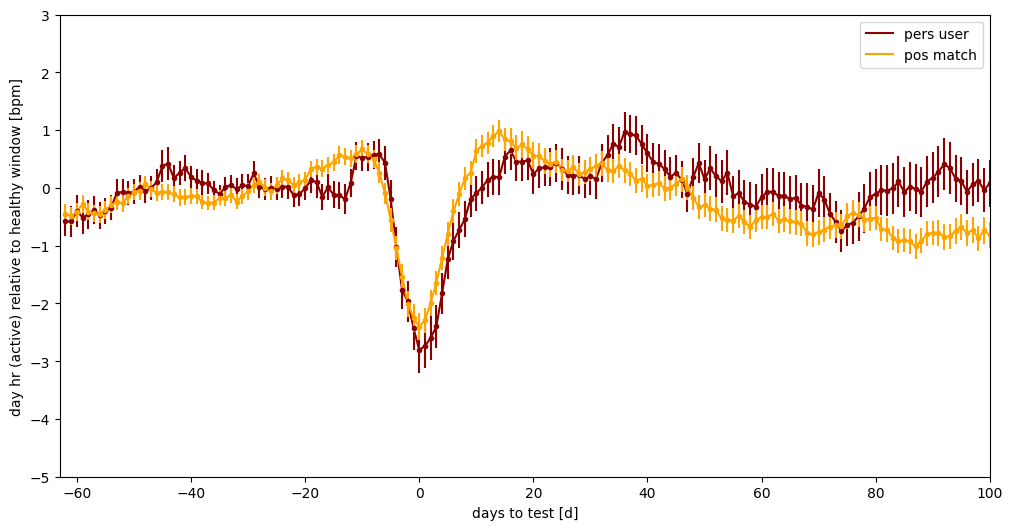

In [26]:
lcu_day_mean.index = pd.to_timedelta(lcu_day_mean.index)
data_lc = lcu_day_mean - lcu_day_mean[lcu_day_mean.index < pd.Timedelta(days=-7)].mean()
data_pos = mu_day_mean - mu_day_mean[mu_day_mean.index < pd.Timedelta(days=-7)].mean()
 
plt.figure(figsize=(12,6))
plt.plot(data_lc.index.days,data_lc.mean(axis=1),c='darkred')
plt.plot(data_pos.index.days,data_pos.mean(axis=1),c='orange')
 
plt.ylim(-5,3)
plt.xlim(-63,100)
#plt.errorbar(data.index.days,data.mean(axis=1),yerr = data.std(axis=1)/np.sqrt(data.notna().sum(axis=1).values), fmt=".")
plt.errorbar(data_lc.index.days,data_lc.mean(axis=1),yerr = data_lc.std(axis=1)/np.sqrt(data_lc.notna().sum(axis=1).values),c='darkred', fmt=".")
plt.errorbar(data_pos.index.days,data_pos.mean(axis=1),yerr = data_pos.std(axis=1)/np.sqrt(data_pos.notna().sum(axis=1).values),c='orange', fmt=".")
#plt.errorbar(data_neg.index.days,data_neg.mean(axis=1),yerr = data_neg.std(axis=1)/np.sqrt(data_neg.notna().sum(axis=1).values),c='grey', fmt=".")
plt.xlabel('days to test [d]')
plt.ylabel('day hr (active) relative to healthy window [bpm]')
plt.legend(['pers user', 'pos match' ]);

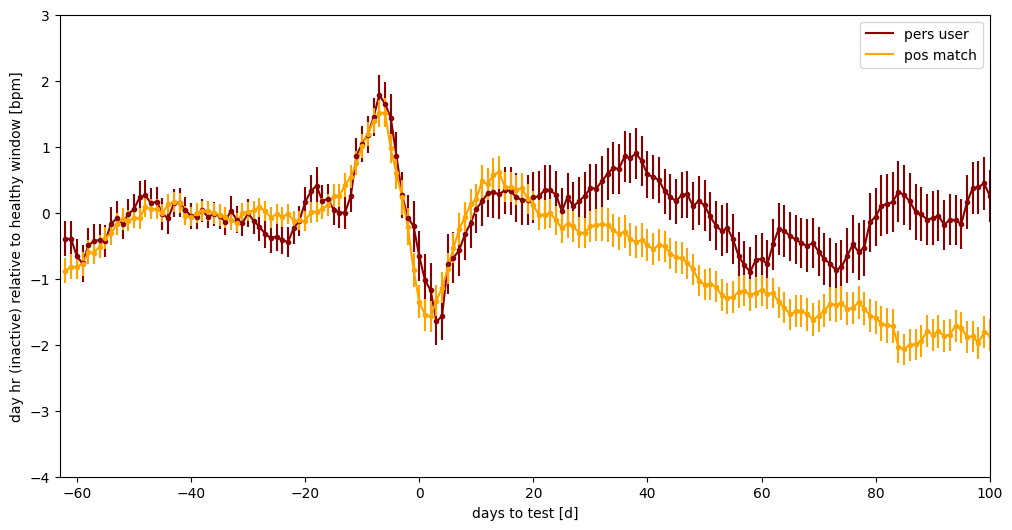

In [27]:
lcu_dayr_mean.index = pd.to_timedelta(lcu_dayr_mean.index)
data_lc = lcu_dayr_mean - lcu_dayr_mean[lcu_dayr_mean.index < pd.Timedelta(days=-7)].mean()
data_pos = mu_dayr_mean - mu_dayr_mean[mu_dayr_mean.index < pd.Timedelta(days=-7)].mean()
 
plt.figure(figsize=(12,6))
plt.plot(data_lc.index.days,data_lc.mean(axis=1),c='darkred')
plt.plot(data_pos.index.days,data_pos.mean(axis=1),c='orange')
 
plt.ylim(-4,3)
plt.xlim(-63,100)
#plt.errorbar(data.index.days,data.mean(axis=1),yerr = data.std(axis=1)/np.sqrt(data.notna().sum(axis=1).values), fmt=".")
plt.errorbar(data_lc.index.days,data_lc.mean(axis=1),yerr = data_lc.std(axis=1)/np.sqrt(data_lc.notna().sum(axis=1).values),c='darkred', fmt=".")
plt.errorbar(data_pos.index.days,data_pos.mean(axis=1),yerr = data_pos.std(axis=1)/np.sqrt(data_pos.notna().sum(axis=1).values),c='orange', fmt=".")
 
plt.xlabel('days to test [d]')
plt.ylabel('day hr (inactive) relative to healthy window [bpm]')
plt.legend(['pers user', 'pos match' ]);

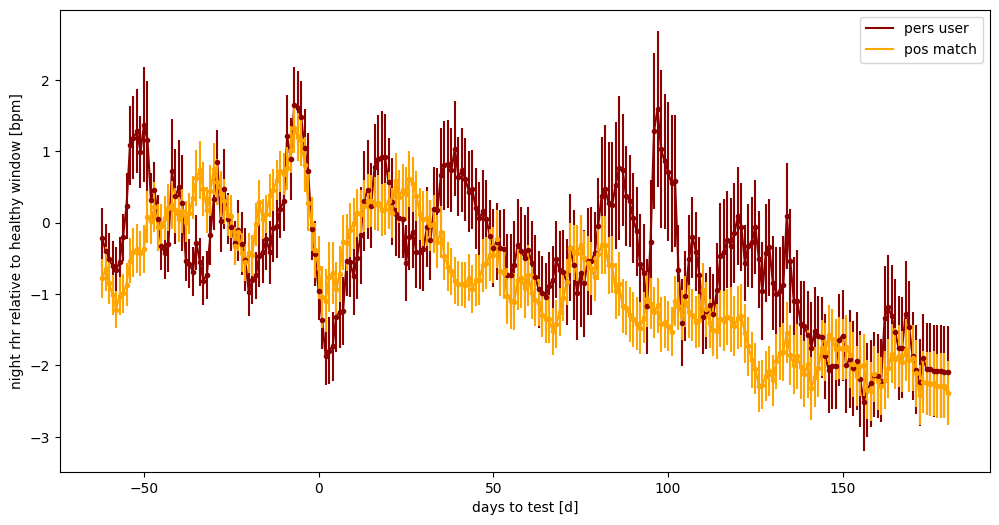

In [28]:
lcu_night_mean.index = pd.to_timedelta(lcu_night_mean.index)
data_lc = lcu_night_mean - lcu_night_mean[lcu_night_mean.index < pd.Timedelta(days=-7)].mean()
data_pos = mu_night_mean - mu_night_mean[mu_night_mean.index < pd.Timedelta(days=-7)].mean()
 
plt.figure(figsize=(12,6))
plt.plot(data_lc.index.days,data_lc.mean(axis=1),c='darkred')
plt.plot(data_pos.index.days,data_pos.mean(axis=1),c='orange')
 
#plt.ylim(-5.5,7)
#plt.xlim(-63,100)
#plt.errorbar(data.index.days,data.mean(axis=1),yerr = data.std(axis=1)/np.sqrt(data.notna().sum(axis=1).values), fmt=".")
plt.errorbar(data_lc.index.days,data_lc.mean(axis=1),yerr = data_lc.std(axis=1)/np.sqrt(data_lc.notna().sum(axis=1).values),c='darkred', fmt=".")#
plt.errorbar(data_pos.index.days,data_pos.mean(axis=1),yerr = data_pos.std(axis=1)/np.sqrt(data_pos.notna().sum(axis=1).values),c='orange', fmt=".")
 
plt.xlabel('days to test [d]')
plt.ylabel('night rhr relative to healthy window [bpm]')
plt.legend(['pers user', 'pos match' ]);

In [15]:
lcu_rhr_mean.index = pd.to_timedelta(lcu_rhr_mean.index ) 

In [16]:
lcu_rhr_mean.index = pd.to_timedelta(lcu_rhr_mean.index)

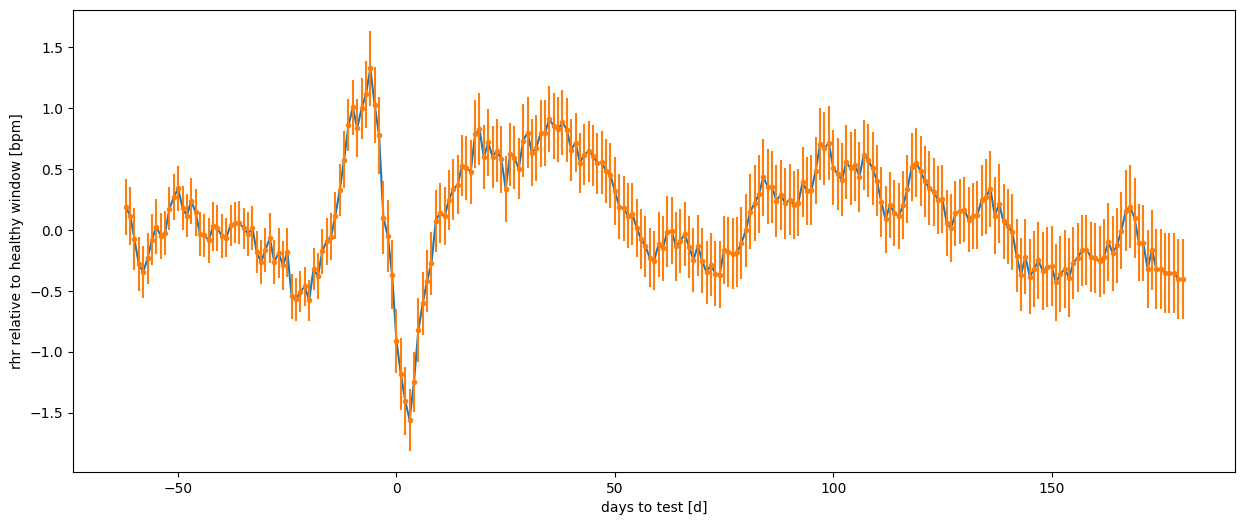

In [19]:
data = lcu_rhr_mean - lcu_rhr_mean[lcu_rhr_mean.index < pd.Timedelta(days=-7)].mean()
plt.figure(figsize=(15,6))
plt.plot(data.index.days,data.mean(axis=1))
plt.errorbar(data.index.days,data.mean(axis=1),yerr = data.std(axis=1)/np.sqrt(data.notna().sum(axis=1).values), fmt=".")
plt.xlabel('days to test [d]')
plt.ylabel('rhr relative to healthy window [bpm]');

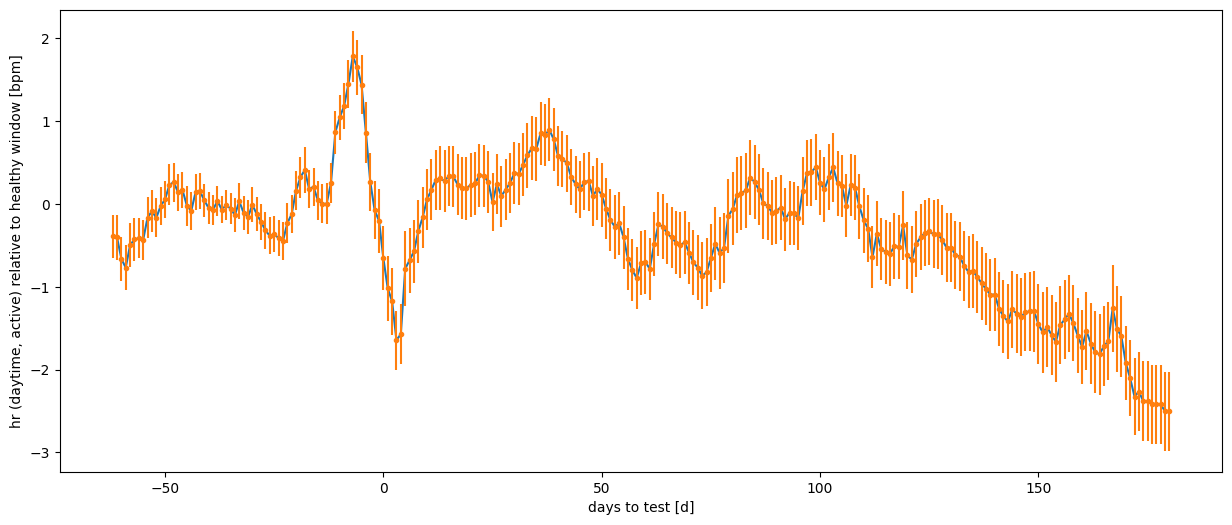

In [21]:
lcu_dayr_mean.index = pd.to_timedelta(lcu_dayr_mean.index)
data = lcu_dayr_mean - lcu_dayr_mean[lcu_dayr_mean.index < pd.Timedelta(days=-7)].mean()
plt.figure(figsize=(15,6))
plt.plot(data.index.days,data.mean(axis=1))
plt.errorbar(data.index.days,data.mean(axis=1),yerr = data.std(axis=1)/np.sqrt(data.notna().sum(axis=1).values), fmt=".")
plt.xlabel('days to test [d]')
plt.ylabel('hr (daytime, active) relative to healthy window [bpm]');

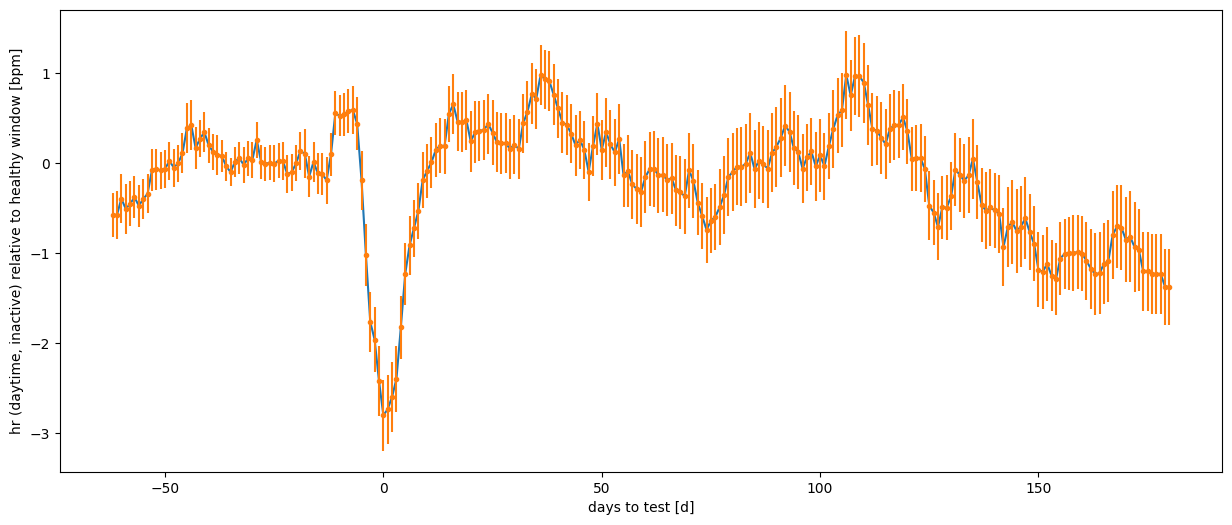

In [22]:
lcu_day_mean.index = pd.to_timedelta(lcu_day_mean.index)
data = lcu_day_mean - lcu_day_mean[lcu_day_mean.index < pd.Timedelta(days=-7)].mean()
plt.figure(figsize=(15,6))
plt.plot(data.index.days,data.mean(axis=1))
plt.errorbar(data.index.days,data.mean(axis=1),yerr = data.std(axis=1)/np.sqrt(data.notna().sum(axis=1).values), fmt=".")
plt.xlabel('days to test [d]')
plt.ylabel('hr (daytime, inactive) relative to healthy window [bpm]');

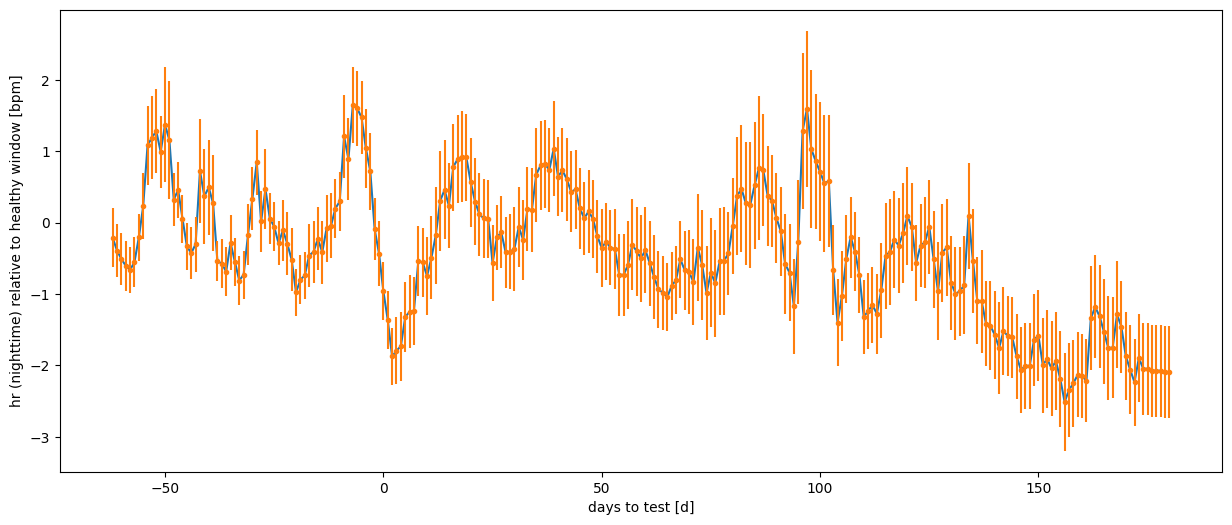

In [23]:
lcu_night_mean.index = pd.to_timedelta(lcu_night_mean.index)
data = lcu_night_mean - lcu_night_mean[lcu_night_mean.index < pd.Timedelta(days=-7)].mean()
plt.figure(figsize=(15,6))
plt.plot(data.index.days,data.mean(axis=1))
plt.errorbar(data.index.days,data.mean(axis=1),yerr = data.std(axis=1)/np.sqrt(data.notna().sum(axis=1).values), fmt=".")
plt.xlabel('days to test [d]')
plt.ylabel('hr (nighttime) relative to healthy window [bpm]');

## mean steps per day in diff phases 

## steps

In [ ]:
# consider people awake from 06 to 22h => 16 hours => 64 15 min time bins
# divide mean steps by 64 to have mean steps per time bin 
# OR
# calc steps pd and subtract daily mean p sc p day

In [32]:
seas = pd.read_csv('mean_steps_pdps.csv',index_col=0)

In [34]:
mean_st_pd = np.zeros((len(cdf),4))
for u in range(len(cdf)):
    df = cdf[u].copy()
    df['dt'] = pd.to_datetime(df['dt'])
    df['date'] = pd.to_datetime(df['date'])
    sc = df.source[df.source.notna()].iloc[0]
    seas_sc = seas[seas.source == sc].copy()
    seas_sc['date'] = pd.to_datetime(seas_sc['date'])
    df = df[['start','steps','date','day_of_week', 'dt','day_totest', 'week_totest','phase']]
    #df_seas = pd.merge(df,seas_sc, how = 'outer', on ='date')
    #df_seas = df_seas.dropna()
    #df_seas['steps_cl'] = df_seas['steps'] - df_seas['mean']
    for ph in range(4):        
        df_seas = pd.merge(df[df['phase'] == ph].groupby('date').sum().reset_index(),seas_sc,how='inner',on='date')
        df_seas = df_seas[df_seas['steps'] != 0]
        steps_pd = df_seas['steps'] - df_seas['mean']
        mean_st_pd[u, ph] = steps_pd.mean()
        
i = 0 
p_mean_st_pd = np.zeros((len(matched_idx),4))
for u in matched_idx:   
    df = mcdf[u].copy()
    df['dt'] = pd.to_datetime(df['dt'])
    df['date'] = pd.to_datetime(df['date'])
    sc = df.source[df.source.notna()].iloc[0]
    seas_sc = seas[seas.source == sc].copy()
    seas_sc['date'] = pd.to_datetime(seas_sc['date'])
    df = df[['start','steps','date','day_of_week', 'dt','day_totest', 'week_totest','phase']]
    for ph in range(4):       
        df_seas = pd.merge(df[df['phase'] == ph].groupby('date').sum().reset_index(),seas_sc,how='inner',on='date')
        df_seas = df_seas[df_seas['steps'] != 0]
        steps_pd = df_seas['steps'] - df_seas['mean']
        p_mean_st_pd[i, ph] = steps_pd.mean()
    i += 1
mask = ~np.isnan(p_mean_st_pd)
p_mean_st_pd= [d[m] for d, m in zip(p_mean_st_pd.T, mask.T)] 

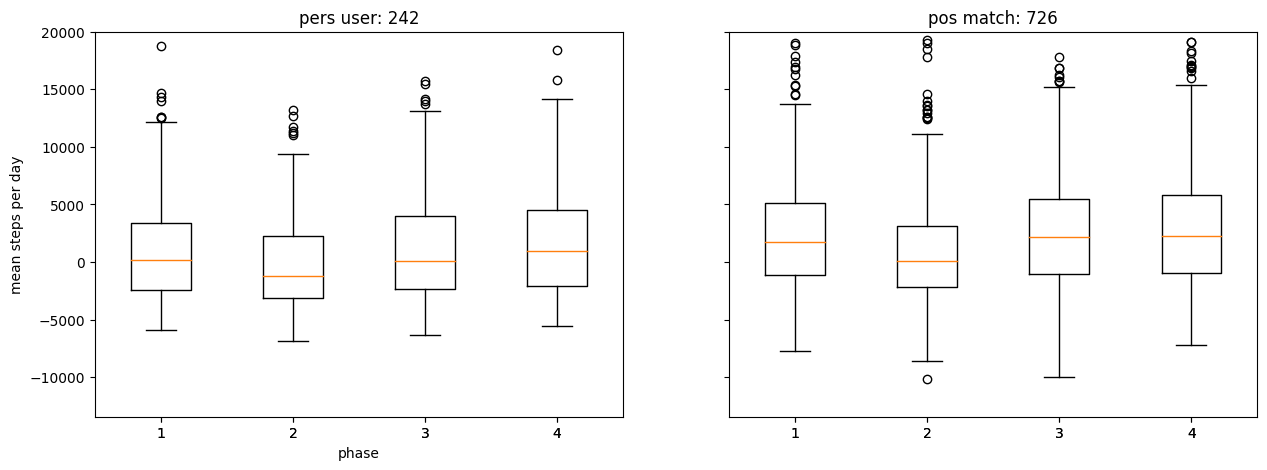

In [36]:
fig,ax = plt.subplots(1,2,figsize=(15,5),sharex=True,sharey=True)
ax[0].boxplot(mean_st_pd);
ax[1].boxplot(p_mean_st_pd);
 
ax[0].set_ylim(top=20000)
#ax[0].hlines(y=np.median(mean_st_pd[:,0]),xmin=0.5, xmax=4.5,color='r')
#ax[1].hlines(y=np.median(p_mean_st_pd[0]),xmin=0.5, xmax=4.5,color='r')
#ax[2].hlines(y=np.median(n_mean_st_pd[0]),xmin=0.5, xmax=4.5,color='r')
ax[0].set_ylabel('mean steps per day')
ax[0].set_xlabel('phase');
ax[1].set_title('pos match: '+str(len(matched_idx)))
 
ax[0].set_title('pers user: '+str(len(cdf)));

## High act

In [37]:
seas = pd.read_csv('mean_steps_pdps.csv',index_col=0)

In [38]:
mu_ha = pd.DataFrame(index = range(-8,26), columns = range(len(matched_idx)))
lcu_ha = pd.DataFrame(index = range(-8,26), columns = range(len(cdf)))
 

In [39]:
for ui in range(len(cdf)):
    sc = cdf[ui].source[cdf[ui].source.notna()].iloc[0]
    seas_sc = seas[seas.source == sc].copy()
    #gb = cdf[ui].groupby(['week_totest','day_of_week']).sum()
    gb = pd.merge(cdf[ui].groupby(['week_totest','date']).sum().reset_index(), seas_sc, how='inner',on='date')
    #gb = gb[(gb.index >= (-8,0))&(gb.index < (26,0))]
    gb = gb[(gb.week_totest >= -8)&(gb.week_totest < 26)]
    #fil = gb['steps'] > 10000
    gb['fil'] = gb['steps'] > (gb['mean'] + ( gb['std']))
    lcu_ha.loc[gb.groupby('week_totest').sum().index,ui] = gb.groupby('week_totest').sum()['fil'].values
i = 0 
for ui in matched_idx:
    sc = mcdf[ui].source[mcdf[ui].source.notna()].iloc[0]
    seas_sc = seas[seas.source == sc].copy()
    #gb = mcdf[ui].groupby(['week_totest','day_of_week']).sum()
    gb = pd.merge(mcdf[ui].groupby(['week_totest','date']).sum().reset_index(), seas_sc, how='inner',on='date')
    #gb = gb[(gb.index >= (-8,0))&(gb.index < (26,0))]
    gb = gb[(gb.week_totest >= -8)&(gb.week_totest < 26)]
    #fil = gb['steps'] > 10000
    gb['fil'] = gb['steps'] > (gb['mean'] + ( gb['std']))
    mu_ha.loc[gb.groupby('week_totest').sum().index,i] = gb.groupby('week_totest').sum()['fil'].values
    i += 1

Text(0.5, 0, 'weeks to test')

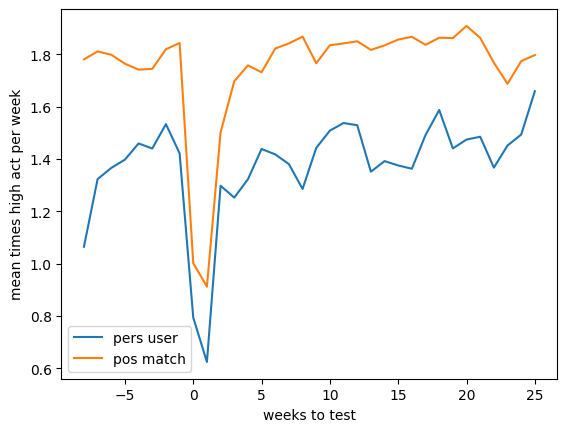

In [40]:
plt.plot(lcu_ha.mean(axis=1))
plt.plot(mu_ha.mean(axis=1)) 
plt.legend(['pers user', 'pos match', ])
plt.ylabel('mean times high act per week')
plt.xlabel('weeks to test')

In [41]:
import seaborn as sns

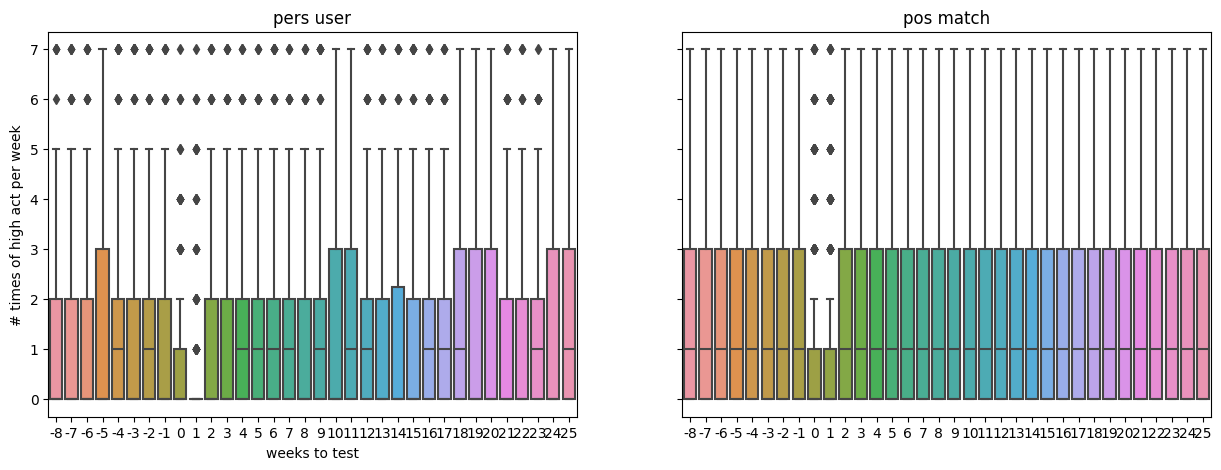

In [44]:
fig,ax = plt.subplots(1,2,figsize=(15,5),sharex=True,sharey=True)
sns.boxplot(lcu_ha.T,ax = ax[0])
sns.boxplot(mu_ha.T,ax = ax[1])
 
ax[0].set_ylabel('# times of high act per week')
ax[0].set_xlabel('weeks to test')
ax[1].set_title('pos match')
 
ax[0].set_title('pers user');

In [45]:
hah_lc = np.zeros((len(lcu_ha),8))
 
hah_m = np.zeros((len(lcu_ha),8))
for nt in range(8):
    t = lcu_ha == nt
    hah_lc[:,nt] = t.sum(axis=1)/lcu_ha.notna().sum(axis=1)
    t = mu_ha == nt
    hah_m[:,nt] = t.sum(axis=1)/mu_ha.notna().sum(axis=1)
     

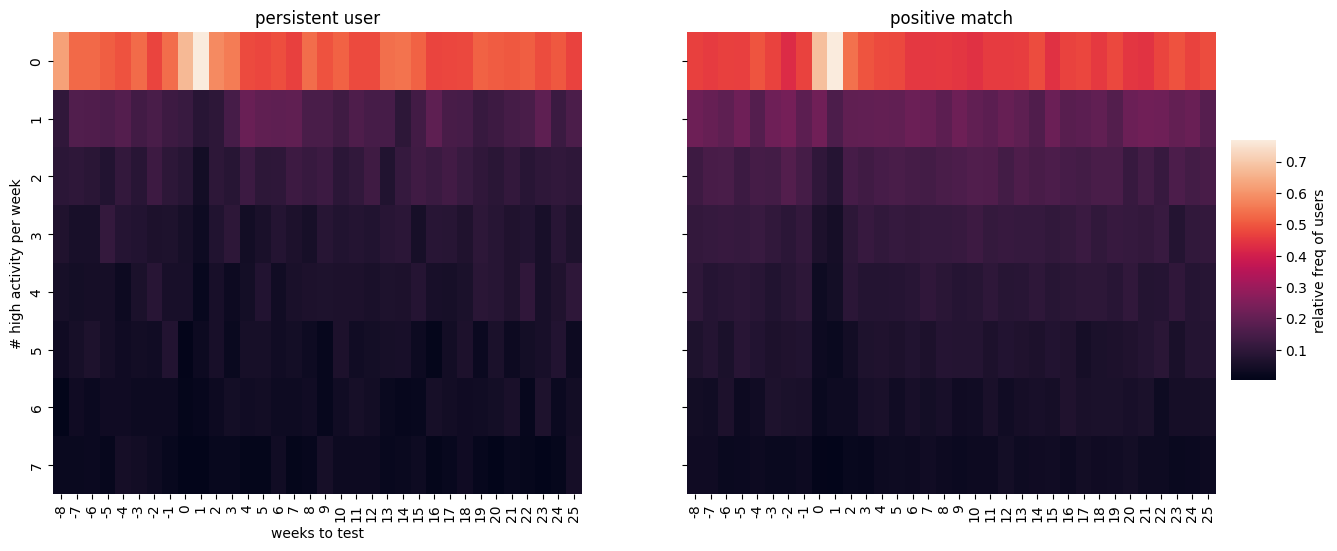

In [47]:
fig, axn = plt.subplots(1, 2,figsize=(15,6), sharex=True, sharey=True)
cbar_ax = fig.add_axes([.91, .3, .03, .4])
hmaps = [hah_lc.T, hah_m.T ]
title = ['persistent user', 'positive match' ]
for i, ax in enumerate(axn.flat): 
    sns.heatmap(hmaps[i], ax=ax, #cmap='vlag',
                cbar=i == 0,
                #vmin = 0, vmax = np.nanmax(xhd),
                #vmin=-1, vmax=np.nanmax(xhd-norm)/norm,
                cbar_ax=None if i else cbar_ax,cbar_kws={'label': 'relative freq of users'},xticklabels=lcu_ha.index)
    
    axn[i].set_title(title[i])

#fig.tight_layout(rect=[0, 0, .9, 1])
axn[0].set_ylabel('# high activity per week')
axn[0].set_xlabel('weeks to test');

## steps

In [ ]:
# consider people awake from 06 to 22h => 16 hours => 64 15 min time bins
# divide mean steps by 64 to have mean steps per time bin 
# OR
# calc steps pd and subtract daily mean p sc p day

In [86]:
seas = pd.read_csv('mean_steps_pdps.csv',index_col=0)

In [87]:
mean_st_pd = np.zeros((len(cdf),4))
for u in range(len(cdf)):
    df = cdf[u].copy()
    df['dt'] = pd.to_datetime(df['dt'])
    df['date'] = pd.to_datetime(df['date'])
    sc = df.source.unique()[0]
    seas_sc = seas[seas.source == sc].copy()
    seas_sc['date'] = pd.to_datetime(seas_sc['date'])
    df = df[['start','steps','date','day_of_week', 'dt','day_totest', 'week_totest','phase']]
    #df_seas = pd.merge(df,seas_sc, how = 'outer', on ='date')
    #df_seas = df_seas.dropna()
    #df_seas['steps_cl'] = df_seas['steps'] - df_seas['mean']
    for ph in range(4):        
        df_seas = pd.merge(df[df['phase'] == ph].groupby('date').sum().reset_index(),seas_sc,how='inner',on='date')
        df_seas = df_seas[df_seas['steps'] != 0]
        steps_pd = df_seas['steps'] - df_seas['mean']
        mean_st_pd[u, ph] = steps_pd.mean()
        
 

i = 0 
p_mean_st_pd = np.zeros((len(matched_idx),4))
for u in matched_idx:   
    df = mcdf[u].copy()
    df['dt'] = pd.to_datetime(df['dt'])
    df['date'] = pd.to_datetime(df['date'])
    sc = df.source.unique()[0]
    seas_sc = seas[seas.source == sc].copy()
    seas_sc['date'] = pd.to_datetime(seas_sc['date'])
    df = df[['start','steps','date','day_of_week', 'dt','day_totest', 'week_totest','phase']]
    for ph in range(4):       
        df_seas = pd.merge(df[df['phase'] == ph].groupby('date').sum().reset_index(),seas_sc,how='inner',on='date')
        df_seas = df_seas[df_seas['steps'] != 0]
        steps_pd = df_seas['steps'] - df_seas['mean']
        p_mean_st_pd[i, ph] = steps_pd.mean()
    i += 1
mask = ~np.isnan(p_mean_st_pd)
p_mean_st_pd= [d[m] for d, m in zip(p_mean_st_pd.T, mask.T)] 

In [ ]:
plt.boxplot(mean_st_pd);
plt.matplotlib.pyplot.hlines(y=np.median(mean_st_pd[:,0]),xmin=0.5, xmax=4.5,color='r')
plt.ylabel('mean steps per day')
plt.xlabel('phase');

## Epoch and Symptoms

## HR and RHR

In [ ]:
def sliding_window(elements, window_size):
    wi_days = []
    for i in range(1,len(elements)+1):
        if i >= window_size:
            wi_days.append(elements[i-window_size:i])
        elif i < window_size:
            wi_days.append(elements[:i])
    return wi_days

In [ ]:
def get_md(subd):
    subd = subd.copy()
    subd['start'] = pd.to_datetime(subd['start'])
    subd = subd[subd['start'].notna()]
    if len(subd) > 0:
        night = subd[(subd['start'].dt.time < pd.to_datetime('07:00:00').time())&((subd['steps'].isna())|(subd['steps']==0))]['hr'].dropna()
        day = subd[(subd['start'].dt.time >= pd.to_datetime('07:00:00').time())&((subd['steps'].notna())&(subd['steps']!=0))]['hr'].dropna()
        #rhr_rel = subd[(subd['start'].dt.time < pd.to_datetime('07:00:00').time())&((subd['steps'].isna())|(subd['steps']==0))]['% of MHR'].dropna()
        rhr_rel = subd['rhr'].dropna()
        hr_rel = subd[(subd['start'].dt.time >= pd.to_datetime('07:00:00').time())&((subd['steps'].notna())&(subd['steps']!=0))]['% of MHR'].dropna()
        if len(day) >= 20 and len(night) < 5:
                return 0,0,day.mean(), day.std() #,0, hr_rel.mean()
        elif len(day) >= 20 and len(night) >= 5:
                return night.mean(), night.std(), day.mean(), day.std() #, rhr_rel.mean(), hr_rel.mean()
        else:
            return 0,0,0,0#,0,0
    else:
        return 0,0,0,0#,0,0

In [ ]:
mins = []
maxs = []
minw = []
maxw = []
for ui in range(len(cdf)): #np.where(s_i & a_i)[0]
    df = cdf[ui]
    df['dt'] = pd.to_datetime(df['dt'])
    df['date'] = pd.to_datetime(df['date'])
    df['day_totest'] = df['date'] - df['dt']
    mins.append(df['day_totest'].min())
    maxs.append(df['day_totest'].max())
    minw.append(df['week_totest'].min())
    maxw.append(df['week_totest'].max())

In [ ]:
lcu_rhr_mean = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(cdf)))
lcu_day_mean = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(cdf)))
lcu_night_mean = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(cdf)))
lcu_dayr_mean = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(cdf))) 
lcu_diff = pd.DataFrame(index = pd.timedelta_range(datetime.timedelta(days = -62),datetime.timedelta(days = 180)), columns = range(len(cdf))) 
i =0
for ui in range(len(cdf)):# np.where(s_i & a_i)[0]:
    df = cdf[ui].copy()
    df = df[(pd.to_timedelta(df.day_totest).dt.days >= -62) &(pd.to_timedelta(df.day_totest).dt.days <= 180)]
    df['dt'] = pd.to_datetime(df['dt'])
    df['date'] = pd.to_datetime(df['date'])
    df['day_totest'] = df['date'] - df['dt']
    df = df.sort_values(by='date')
    mis_row = []
    for dt in [d for d in pd.date_range(start = df['date'].min(), end = df['date'].max()).difference(df.index) if d not in df['date'].unique()]:
        mis_row.append([
            np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, dt, np.nan, np.nan, np.nan, dt - df['dt'].unique()[0], np.nan, np.nan, np.nan])
    if len(mis_row) > 0:
        df = df.append(pd.DataFrame(data=mis_row, columns=df.columns))
    
    sc = df.source.unique()[0]
    seas_sc = seas[seas.source == sc].copy()
    seas_sc['date'] = pd.to_datetime(seas_sc['date'])
    df = df[['start','rhr','hr','steps','date','day_of_week', 'dt','day_totest', 'week_totest','phase']]
    df_seas = pd.merge(df,seas_sc, how = 'outer', on ='date')
    #df_seas = df_seas.dropna()
    df_seas['rhr_cl'] = df_seas['rhr'] - df_seas['mean']
    df_seas['hr_cl'] = df_seas['hr'] - df_seas['mean']
    #df['day_totest'] = df['date'] - df['dt']
    
    
    wi_list = sliding_window(df['date'].unique(),7)
    dtt_list = sliding_window(df['day_totest'].unique(),7)
    for wi in range(len(wi_list)):
        rhrm, daym, nightm, dayrm = get_rhr(df_seas[df_seas['date'].isin(wi_list[wi])])
        lcu_rhr_mean.loc[lcu_rhr_mean.index.isin(dtt_list[wi]),i] =  rhrm
        lcu_day_mean.loc[lcu_day_mean.index.isin(dtt_list[wi]),i] =  daym
        lcu_dayr_mean.loc[lcu_dayr_mean.index.isin(dtt_list[wi]),i] =  dayrm
        lcu_night_mean.loc[lcu_night_mean.index.isin(dtt_list[wi]),i] =  nightm
        if dayrm != 0 and nightm != 0:
            lcu_diff.loc[lcu_diff.index.isin(dtt_list[wi]),i] =  dayrm - nightm
            
         
    i += 1

In [ ]:
lcu_diff = lcu_diff[(lcu_diff.index >= datetime.timedelta(days = -62)) &(lcu_diff.index <= datetime.timedelta(days = 180))]
#lcu_rhr_rel = lcu_rhr_rel[(lcu_rhr_rel.index >= datetime.timedelta(days = -62)) &(lcu_rhr_rel.index <= datetime.timedelta(days = 180))]
lcu_day_mean = lcu_day_mean[(lcu_day_mean.index >= datetime.timedelta(days = -62)) &(lcu_day_mean.index <= datetime.timedelta(days = 180))]
lcu_night_mean = lcu_night_mean[(lcu_night_mean.index >= datetime.timedelta(days = -62)) &(lcu_night_mean.index <= datetime.timedelta(days = 180))]
#lcu_hr_rel = lcu_hr_rel[(lcu_hr_rel.index >= datetime.timedelta(days = -62)) &(lcu_hr_rel.index <= datetime.timedelta(days = 180))]
lcu_night_mean = lcu_night_mean.replace(0, np.nan)
lcu_day_mean = lcu_day_mean.replace(0, np.nan)
lcu_diff = lcu_diff.replace(0,np.nan)

In [ ]:
import seaborn as sns

In [ ]:
data = lcu_night_mean - lcu_night_mean[lcu_night_mean.index < pd.Timedelta(days=-7)].mean()
#data = lcu_diff - lcu_diff[lcu_diff.index < pd.Timedelta(days=-7)].mean(axis=0)
data =  lcu_day_mean - lcu_day_mean[lcu_day_mean.index < pd.Timedelta(days=-7)].mean(axis=0)

In [ ]:
plt.figure(figsize=(35,6))
ax=sns.boxplot(data.T);
#labels = ax.get_xticklabels()
ax.set_xticklabels(data.index.days,rotation = 90);
ax.set_xlabel('days to test [d]')
ax.set_ylabel(' rhr realtive to healthy window - pers user');

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(data.index.days,data.mean(axis=1))
plt.errorbar(data.index.days,data.mean(axis=1),yerr = data.std(axis=1)/np.sqrt(data.notna().sum(axis=1).values), fmt=".")
plt.xlabel('days to test [d]')
plt.ylabel('hr relative to healthy window')

In [ ]:
data.index.days

In [ ]:
# path = os.getcwd()+'/match_c/'
# csv_files = glob.glob(os.path.join(path, "*.csv"))

# mclean = []
# mcsex = []
# mcage = []
# mcdf = []
# for f in csv_files:
      
#     # read the csv file
#     df = pd.read_csv(f, index_col = 0)
#     if len(df['phase'].unique()) >= 4: #and 0 in df['phase'].unique() and 1 in df['phase'].unique():
#         if np.all([np.count_nonzero(df[df['phase']==ph]['hr'].notna()) > 100 for ph in df['phase'].unique()]):
                
#                 mcdf.append(df)
#                 demo_info = f.split("/")[-1].split('.')[0]
                
#                 mclean.append(int(f.split("/")[-1].split('.')[1][1:]))  
#                 mcsex.append(re.split('(\d+)',demo_info)[0])
#                 mcage.append(int(re.split('(\d+)',demo_info)[1]))
# match_user = pd.DataFrame(data =  np.array([mclean, mcsex, mcage]).T,columns = ['uid', 'sex', 'age'])

In [ ]:
#perss_user.groupby(['sex','age']).count()
#match_user.groupby(['sex','age']).count()

In [ ]:
#match_user.groupby(by=['age','sex']).sum()

In [ ]:
# matched_idx = []
# used = []
# for p in range(len(perss_user.groupby(by=['age','sex']).sum())):
     
#     val = perss_user.groupby(by=['age','sex']).sum().values[p][0]
#     age = perss_user.groupby(by=['age','sex']).sum().index[p][0]
#     sex = perss_user.groupby(by=['age','sex']).sum().index[p][1]
#     mid = np.random.choice(match_user[(match_user.sex == sex)&(match_user.age == age)&(~match_user.uid.isin(used))].index,val * 3,replace=False)
#     for i in match_user[match_user.index.isin(mid)].uid.values:
#         used.append(i)
#     for i in mid:
#         matched_idx.append(i)
# #matched_idx = list(set(matched_idx ))  

In [ ]:
# testdates = []
# for i in cdf:
#     testdates.append(pd.to_datetime(i.dt.iloc[0]).date())
    
# testdatesc = []
# for i in matched_idx:
#     testdatesc.append(pd.to_datetime(mcdf[i].dt.iloc[0]).date())

In [ ]:
# fig, ax = plt.subplots(1,2,figsize=(8,4))
# ax[0].hist(testdatesc)
# ax[0].tick_params(axis='x', rotation=90)
# ax[0].set_ylabel('# user control');
# ax[1].hist(testdates)
# ax[1].tick_params(axis='x', rotation=90)
# ax[1].set_ylabel('# user pers');

In [ ]:
mins = []
maxs = []
minw = []
maxw = []
for ui in range(len(cdf)): #np.where(s_i & a_i)[0]
    df = cdf[ui]
    df['dt'] = pd.to_datetime(df['dt'])
    df['date'] = pd.to_datetime(df['date'])
    df['day_totest'] = df['date'] - df['dt']
    mins.append(df['day_totest'].min())
    maxs.append(df['day_totest'].max())
    minw.append(df['week_totest'].min())
    maxw.append(df['week_totest'].max())
    
for ui in matched_idx: #np.where(s_i & a_i)[0]
    df = mcdf[ui]
    df['dt'] = pd.to_datetime(df['dt'])
    df['date'] = pd.to_datetime(df['date'])
    df['day_totest'] = df['date'] - df['dt']
    mins.append(df['day_totest'].min())
    maxs.append(df['day_totest'].max())
    minw.append(df['week_totest'].min())
    maxw.append(df['week_totest'].max())

In [ ]:
lcu_day_mean = pd.DataFrame(index = pd.timedelta_range(min(mins),max(maxs)), columns = range(len(cdf)))
lcu_night_mean = pd.DataFrame(index = pd.timedelta_range(min(mins),max(maxs)), columns = range(len(cdf)))
lcu_diff = pd.DataFrame(index = pd.timedelta_range(min(mins),max(maxs)), columns = range(len(cdf)))
#lcu_rhr_rel = pd.DataFrame(index = pd.timedelta_range(min(mins),max(maxs)), columns = range(len(cdf)))
#lcu_hr_rel = pd.DataFrame(index = pd.timedelta_range(min(mins),max(maxs)), columns = range(len(cdf)))
i =0
for ui in range(len(cdf)):# np.where(s_i & a_i)[0]:
    df = cdf[ui]
    df['dt'] = pd.to_datetime(df['dt'])
    df['date'] = pd.to_datetime(df['date'])
    df['day_totest'] = df['date'] - df['dt']
    df = df.sort_values(by='date')
    mis_row = []
    for dt in [d for d in pd.date_range(start = df['date'].min(), end = df['date'].max()).difference(df.index) if d not in df['date'].unique()]:
        mis_row.append([
            np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, dt, np.nan, np.nan, np.nan, dt - df['dt'].unique()[0], np.nan, np.nan, np.nan])
    if len(mis_row) > 0:
        df = df.append(pd.DataFrame(data=mis_row, columns=df.columns))
    

    #df['day_totest'] = df['date'] - df['dt']
    wi_list = sliding_window(df['date'].unique(),7)
    dtt_list = sliding_window(df['day_totest'].unique(),7)
    for wi in range(len(wi_list)):
        nm, ns, dm, ds = get_md(df[df['date'].isin(wi_list[wi])])
        lcu_day_mean.loc[lcu_day_mean.index.isin(dtt_list[wi]),i] =  dm
        lcu_night_mean.loc[lcu_night_mean.index.isin(dtt_list[wi]),i] =  nm
        #lcu_rhr_rel.loc[lcu_rhr_rel.index.isin(dtt_list[wi]),i] =  rhrr
        #lcu_hr_rel.loc[lcu_rhr_rel.index.isin(dtt_list[wi]),i] =  hrr
        if dm != 0 and nm != 0:
            lcu_diff.loc[lcu_night_mean.index.isin(dtt_list[wi]),i] = (dm - nm)/dm
    i += 1

In [ ]:
lcu_diff = lcu_diff[(lcu_diff.index >= datetime.timedelta(days = -62)) &(lcu_diff.index <= datetime.timedelta(days = 180))]
#lcu_rhr_rel = lcu_rhr_rel[(lcu_rhr_rel.index >= datetime.timedelta(days = -62)) &(lcu_rhr_rel.index <= datetime.timedelta(days = 180))]
lcu_day_mean = lcu_day_mean[(lcu_day_mean.index >= datetime.timedelta(days = -62)) &(lcu_day_mean.index <= datetime.timedelta(days = 180))]
lcu_night_mean = lcu_night_mean[(lcu_night_mean.index >= datetime.timedelta(days = -62)) &(lcu_night_mean.index <= datetime.timedelta(days = 180))]
#lcu_hr_rel = lcu_hr_rel[(lcu_hr_rel.index >= datetime.timedelta(days = -62)) &(lcu_hr_rel.index <= datetime.timedelta(days = 180))]

In [ ]:
#lcu_rhr_rel = lcu_rhr_rel.replace(0, np.nan)
#lcu_hr_rel = lcu_hr_rel.replace(0, np.nan)
lcu_night_mean = lcu_night_mean.replace(0, np.nan)
lcu_day_mean = lcu_day_mean.replace(0, np.nan)
lcu_diff = lcu_diff.replace(0,np.nan)

In [ ]:
lcu_diff - lcu_diff[lcu_diff.index < pd.Timedelta(days=-7)].mean(axis=0)

In [ ]:
# plt.figure(figsize=(15,6))
# #plt.plot(mu_rhr_rel.index.days,mu_rhr_rel.mean(axis=1) );
# lcu_diffrel = lcu_rhr_rel - lcu_rhr_rel[lcu_rhr_rel.index < pd.Timedelta(days=-7)].mean(axis=0)
# plt.plot(lcu_diffrel.index.days, lcu_diffrel.mean(axis=1))
# plt.xlabel('days to test [d]')
# plt.ylabel('rhr - mean of healthy window');

In [ ]:
# plt.figure(figsize=(15,6))
# #plt.plot(mu_rhr_rel.index.days,mu_rhr_rel.mean(axis=1) );
# lcu_diffrel = lcu_diff - lcu_diff[lcu_diff.index < pd.Timedelta(days=-7)].mean(axis=0)
# plt.plot(lcu_diffrel.index.days, lcu_diffrel.mean(axis=1))
# plt.xlabel('days to test [d]')
# plt.ylabel('diff hr rhr - mean of healthy window');

In [ ]:
plt.figure(figsize=(15,6))
#plt.plot(mu_rhr_rel.index.days,mu_rhr_rel.mean(axis=1) );
lcumeanrhrrel = lcu_night_mean - lcu_night_mean[lcu_night_mean.index < pd.Timedelta(days=-7)].mean(axis=0)
plt.plot(lcumeanrhrrel.index.days, lcumeanrhrrel.mean(axis=1))
plt.errorbar(lcumeanrhrrel.index.days,lcumeanrhrrel.mean(axis=1),yerr = lcumeanrhrrel.std(axis=1)/np.sqrt(lcumeanrhrrel.notna().sum(axis=1).values), fmt=".")

#plt.plot(lcu_rhr_rel[lcu_rhr_rel.columns[lcu_rhr_rel.notna().sum(axis=0) > 110]].index.days,lcu_rhr_rel[lcu_rhr_rel.columns[lcu_rhr_rel.notna().sum(axis=0) > 110]].mean(axis=1) );
#plt.errorbar(mu_diff.index.days,mu_diff.mean(axis=1),yerr=mu_diff.std(axis=1)/np.sqrt(mu_diff.notna().sum(axis=1).values), fmt=".")
#plt.xticks( df_cu_diff.index,labels=[str(i) for i in df_cu_diff.index.days//7]);
plt.xlabel('days to test')
#plt.legend(['matched positive cohort', 'user w persisting symtpoms'])
plt.ylabel('mean rhr relative to mean in healthy window');

In [ ]:
plt.figure(figsize=(15,6))
#plt.plot(mu_rhr_rel.index.days,mu_rhr_rel.mean(axis=1) );
lcumeanhrrel = lcu_day_mean - lcu_day_mean[lcu_day_mean.index < pd.Timedelta(days=-7)].mean(axis=0)
plt.plot(lcumeanhrrel.index.days, lcumeanhrrel.mean(axis=1)) 

plt.errorbar(lcumeanhrrel.index.days,lcumeanhrrel.mean(axis=1),yerr = lcumeanhrrel.std(axis=1)/np.sqrt(lcumeanhrrel.notna().sum(axis=1).values), fmt=".")
plt.xlabel('days to test')
#plt.legend(['matched positive cohort', 'user w persisting symtpoms'])
plt.ylabel('mean hr relative to mean in healthy window');

In [ ]:
plt.plot(lcu_day_mean.index.days,lcu_day_mean.notna().sum(axis=1))
plt.plot(lcu_night_mean.index.days,lcu_night_mean.notna().sum(axis=1))
plt.legend(['day','night']);
plt.xlabel('days to test')
#plt.legend(['matched positive cohort', 'user w persisting symtpoms'])
plt.ylabel('# user');

In [ ]:
mu_day_mean = pd.DataFrame(index = pd.timedelta_range(min(mins),max(maxs)), columns = range(len(mcdf)))
mu_night_mean = pd.DataFrame(index = pd.timedelta_range(min(mins),max(maxs)), columns = range(len(mcdf)))
mu_diff = pd.DataFrame(index = pd.timedelta_range(min(mins),max(maxs)), columns = range(len(mcdf)))
#mu_rhr_rel = pd.DataFrame(index = pd.timedelta_range(min(mins),max(maxs)), columns = range(len(mcdf)))
#mu_hr_rel = pd.DataFrame(index = pd.timedelta_range(min(mins),max(maxs)), columns = range(len(mcdf)))
i = 0
for ui in matched_idx:
    df = mcdf[ui]
    df['dt'] = pd.to_datetime(df['dt'])
    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values(by='date')
    mis_row = []
    for dt in [d for d in pd.date_range(start = df['date'].min(), end = df['date'].max()).difference(df.index) if d not in df['date'].unique()]:
        mis_row.append([
            np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, dt, np.nan, np.nan, np.nan, dt - df['dt'].unique()[0], np.nan, np.nan, np.nan])
    if len(mis_row) > 0:
        df = df.append(pd.DataFrame(data=mis_row, columns=df.columns))
    
    
    #df['day_totest'] = df['date'] - df['dt']
    wi_list = sliding_window(df['date'].unique(),7)
    dtt_list = sliding_window(df['day_totest'].unique(),7)
    for wi in range(len(wi_list)):
        nm, ns, dm, ds,  = get_md(df[df['date'].isin(wi_list[wi])])
        mu_day_mean.loc[mu_day_mean.index.isin(dtt_list[wi]),i] =  dm
        mu_night_mean.loc[mu_night_mean.index.isin(dtt_list[wi]),i] =  nm
        #mu_rhr_rel.loc[mu_rhr_rel.index.isin(dtt_list[wi]),i] =  rhrr
        #mu_hr_rel.loc[mu_rhr_rel.index.isin(dtt_list[wi]),i] = hrr
        if dm != 0 and nm != 0:
            mu_diff.loc[mu_night_mean.index.isin(dtt_list[wi]),i] = (dm - nm)/dm
    i += 1
        

In [ ]:
mu_diff = mu_diff[(mu_diff.index >= datetime.timedelta(days = -62)) &(mu_diff.index <= datetime.timedelta(days = 180))]
#mu_rhr_rel = mu_rhr_rel[(mu_rhr_rel.index >= datetime.timedelta(days = -62)) &(mu_rhr_rel.index <= datetime.timedelta(days = 180))]
#mu_hr_rel = mu_hr_rel[(mu_hr_rel.index >= datetime.timedelta(days = -62)) &(mu_hr_rel.index <= datetime.timedelta(days = 180))]
mu_day_mean = mu_day_mean[(mu_day_mean.index >= datetime.timedelta(days = -62)) &(mu_day_mean.index <= datetime.timedelta(days = 180))]
mu_night_mean = mu_night_mean[(mu_night_mean.index >= datetime.timedelta(days = -62)) &(mu_night_mean.index <= datetime.timedelta(days = 180))]

In [ ]:
mu_night_mean = mu_night_mean.replace(0, np.nan)
mu_day_mean = mu_day_mean.replace(0, np.nan)
mu_diff = mu_diff.replace(0,np.nan)

In [ ]:
data = mu_night_mean - mu_night_mean[mu_night_mean.index < pd.Timedelta(days=-7)].mean()
data = mu_diff - mu_diff[mu_diff.index < pd.Timedelta(days=-7)].mean(axis=0)
#data =  mu_day_mean #- mu_day_mean[mu_day_mean.index < pd.Timedelta(days=-7)].mean(axis=0)

In [ ]:
plt.figure(figsize=(35,6))
ax=sns.boxplot(data.T);
#labels = ax.get_xticklabels()
ax.set_xticklabels(data.index.days,rotation = 90);
ax.set_xlabel('days to test [d]')
ax.set_ylabel('hr rhr diff rel to healthy window   - match user ');

In [ ]:
# a = 60
# s_i = (np.array(csex) == 'female') | (np.array(csex) == 'male')
# a_i = np.array(cage) == a 

# puser = np.array(clean)[np.where(s_i & a_i)[0]]

# ms_i = (np.array(mcsex) == 'female') | (np.array(mcsex) == 'male')
# ma_i = np.array(mcage) == a 

# muser = np.array(mclean)[np.where(ms_i & ma_i)[0]]

In [ ]:
# plt.figure(figsize=(15,6))
# plt.plot(mu_diff.index.days,mu_diff.mean(axis=1));

# plt.plot(lcu_diff.index.days,lcu_diff.mean(axis=1));
# #plt.errorbar(mu_diff.index.days,mu_diff.mean(axis=1),yerr=mu_diff.std(axis=1)/np.sqrt(mu_diff.notna().sum(axis=1).values), fmt=".")
# #plt.xticks( df_cu_diff.index,labels=[str(i) for i in df_cu_diff.index.days//7]);
# plt.xlabel('days to test')
# plt.legend(['matched positive cohort', 'user w persisting symtpoms'])
# plt.ylabel('mean relative difference of hr and rhr');

In [ ]:
plt.figure(figsize=(15,6))
mumeanrhrrel = mu_night_mean - mu_night_mean[mu_night_mean.index < pd.Timedelta(days=-7)].mean(axis=0)
plt.plot(mumeanrhrrel.index.days, mumeanrhrrel.mean(axis=1))
plt.errorbar(mumeanrhrrel.index.days,mumeanrhrrel.mean(axis=1),yerr = mumeanrhrrel.std(axis=1)/np.sqrt(mumeanrhrrel.notna().sum(axis=1).values), fmt=".")
plt.ylim(-4.9,4)
plt.xlabel('days to test') 
plt.ylabel('mean rhr relative to mean in healthy window');

In [ ]:
plt.figure(figsize=(15,6))
mumeanhrrel = mu_day_mean - mu_day_mean[mu_day_mean.index < pd.Timedelta(days=-7)].mean(axis=0)
plt.plot(mumeanhrrel.index.days, mumeanhrrel.mean(axis=1))
plt.errorbar(mumeanhrrel.index.days,mumeanhrrel.mean(axis=1),yerr = mumeanhrrel.std(axis=1)/np.sqrt(mumeanhrrel.notna().sum(axis=1).values), fmt=".")
plt.ylim(-4.3,2.3)
plt.xlabel('days to test') 
plt.ylabel('mean hr relative to mean in healthy window');

In [ ]:
plt.plot(mu_day_mean.index.days,mu_day_mean.notna().sum(axis=1))
plt.plot(mu_night_mean.index.days,mu_night_mean.notna().sum(axis=1))
plt.legend(['day','night']);
plt.xlabel('days to test')
#plt.legend(['matched positive cohort', 'user w persisting symtpoms'])
plt.ylabel('# user');

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(20,6),sharex=True,sharey=True)
#plt.plot(mu_rhr_rel.index.days,mu_rhr_rel.mean(axis=1) );
lcu_diffrel = lcu_diff - lcu_diff[lcu_diff.index < pd.Timedelta(days=-7)].mean(axis=0)
ax[0].plot(lcu_diffrel.index.days, lcu_diffrel.mean(axis=1))
ax[0].errorbar(lcu_diffrel.index.days,lcu_diffrel.mean(axis=1),yerr = lcu_diffrel.std(axis=1)/np.sqrt(lcu_diffrel.notna().sum(axis=1).values), fmt=".")
mu_diffrel = mu_diff - mu_diff[mu_diff.index < pd.Timedelta(days=-7)].mean(axis=0)

ax[1].plot(mu_diffrel.index.days, mu_diffrel.mean(axis=1))
ax[1].errorbar(mu_diffrel.index.days,mu_diffrel.mean(axis=1),yerr = mu_diffrel.std(axis=1)/np.sqrt(mu_diffrel.notna().sum(axis=1).values), fmt=".")
ax[0].set_xlabel('days to test [d]')
ax[0].set_ylabel('diff hr rhr - mean of healthy window');
ax[0].set_title('pers user')
ax[1].set_title('match user');

In [ ]:
plt.figure(figsize=(15,6))
#plt.plot(mu_rhr_rel.index.days,mu_rhr_rel.mean(axis=1) );
mu_diffrel = mu_diff - mu_diff[mu_diff.index < pd.Timedelta(days=-7)].mean(axis=0)

plt.plot(mu_diffrel.index.days, mu_diffrel.mean(axis=1))
plt.errorbar(mu_diffrel.index.days,mu_diffrel.mean(axis=1),yerr = mu_diffrel.std(axis=1)/np.sqrt(mu_diffrel.notna().sum(axis=1).values), fmt=".")

plt.xlabel('days to test [d]')
plt.ylabel('diff hr rhr - mean of healthy window');

In [ ]:
plt.figure(figsize=(15,6))
#plt.plot(mu_rhr_rel.index.days,mu_rhr_rel.mean(axis=1) );

plt.plot(lcu_rhr_rel.index.days,lcu_rhr_rel.mean(axis=1) );
#plt.errorbar(mu_diff.index.days,mu_diff.mean(axis=1),yerr=mu_diff.std(axis=1)/np.sqrt(mu_diff.notna().sum(axis=1).values), fmt=".")
#plt.xticks( df_cu_diff.index,labels=[str(i) for i in df_cu_diff.index.days//7]);
plt.xlabel('days to test')
#plt.legend(['matched positive cohort', 'user w persisting symtpoms'])
plt.ylabel('mean rhr as % to max hr ');

In [ ]:
plt.plot(lcu_rhr_rel.index.days,lcu_rhr_rel.notna().sum(axis=1))

In [ ]:
plt.figure(figsize=(15,6))
#plt.plot(mu_hr_rel.index.days,mu_hr_rel.mean(axis=1) );

plt.plot(lcu_hr_rel.index.days,lcu_hr_rel.mean(axis=1) );
#plt.errorbar(mu_diff.index.days,mu_diff.mean(axis=1),yerr=mu_diff.std(axis=1)/np.sqrt(mu_diff.notna().sum(axis=1).values), fmt=".")
#plt.xticks( df_cu_diff.index,labels=[str(i) for i in df_cu_diff.index.days//7]);
plt.xlabel('days to test')
#plt.legend(['matched positive cohort', 'user w persisting symtpoms'])
plt.ylabel('mean hr as % to max hr ');

In [ ]:
plt.plot(lcu_hr_rel.index.days,lcu_hr_rel.notna().sum(axis=1))

In [ ]:
plt.figure(figsize=(15,6))
#plt.plot(mu_hr_rel.index.days,mu_hr_rel.mean(axis=1) );

plt.plot(lcu_diff.index.days,lcu_diff.mean(axis=1) );

In [ ]:
# plt.figure(figsize=(20,6))
# plt.plot(mu_rhr_rel.index.days,mu_rhr_rel.mean(axis=1)-mu_rhr_rel[mu_rhr_rel.index.days < -14].mean(axis=1).mean());

# plt.plot(lcu_rhr_rel.index.days,lcu_rhr_rel.mean(axis=1)-lcu_rhr_rel[lcu_rhr_rel.index.days < -14].mean(axis=1).mean());
# #plt.errorbar(mu_diff.index.days,mu_diff.mean(axis=1),yerr=mu_diff.std(axis=1)/np.sqrt(mu_diff.notna().sum(axis=1).values), fmt=".")
# #plt.xticks( df_cu_diff.index,labels=[str(i) for i in df_cu_diff.index.days//7]);
# plt.xlabel('days to test')
# plt.legend(['matched positive cohort', 'user w persisting symtpoms'])
# plt.ylabel('mean rhr as % to max hr ');

## High act

In [ ]:
mu_ha = pd.DataFrame(index = range(-8,26), columns = range(len(matched_idx)))
lcu_ha = pd.DataFrame(index = range(-8,26), columns = range(len(cdf)))

In [ ]:
for ui in range(len(cdf)):
    gb = cdf[ui].groupby(['week_totest','day_of_week']).sum()
    gb = gb[(gb.index >= (-8,0))&(gb.index < (26,0))]
    fil = gb['steps'] > 10000
    lcu_ha.loc[fil.groupby('week_totest').sum().index,ui] = fil.groupby('week_totest').sum().values

i = 0 
for ui in matched_idx:
    
    gb = mcdf[ui].groupby(['week_totest','day_of_week']).sum()
    gb = gb[(gb.index >= (-8,0))&(gb.index < (26,0))]
    fil = gb['steps'] > 10000
    mu_ha.loc[fil.groupby('week_totest').sum().index,i] = fil.groupby('week_totest').sum().values
    i += 1

In [ ]:
plt.plot(lcu_ha.mean(axis=1))
plt.plot(mu_ha.mean(axis=1))
plt.legend(['pers user', 'match user'])
plt.ylabel('mean times high act per weak')
plt.xlabel('weeks to test')

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(20,5),sharex=True,sharey=True)
sns.boxplot(lcu_ha.T,ax = ax[0])
sns.boxplot(mu_ha.T,ax = ax[1])
ax[0].set_ylabel('# times of high act per week')
ax[0].set_xlabel('weeks to test')
ax[1].set_title('match user')
ax[0].set_title('pers user');

## HR STEPS

In [ ]:
m_agg = []
for ui in np.where(ms_i & ma_i)[0] :
    df = mcdf[ui]
    df['dt'] = pd.to_datetime(df['dt'])
    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values(by='date')
    # group by day and hourly - sum up steps and take mean of heart rate
    # per day 24 time bins with steps summed up and mean of heart rate

    #for du in range(len(df_lcu[0])): 
    d = df.copy()
    d['start'] = pd.to_datetime(d['start'])
    d['steps'] = d['steps'].fillna(0)
    d['steps'] = d['steps'] + 1

    df_aggv = pd.merge(d[['start','hr','rhr', '% of MHR', 'sleep']].set_index('start').resample('60min').mean().reset_index(),d[['start','steps']].set_index('start').resample('60min').sum().reset_index(),how='outer',on='start')
    d_agg = pd.merge(df_aggv, d[['start','date','day_of_week','weekend','dt','day_totest','week_totest', 'phase', 'source','id']].set_index('start').resample('60min').first().reset_index(),how='outer',on='start')
    m_agg.append(d_agg)

In [ ]:
l_agg = []
for ui in np.where(s_i & a_i)[0] :
    df = cdf[ui]
    df['dt'] = pd.to_datetime(df['dt'])
    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values(by='date')
    # group by day and hourly - sum up steps and take mean of heart rate
    # per day 24 time bins with steps summed up and mean of heart rate

    #for du in range(len(df_lcu[0])): 
    d = df.copy()
    d['start'] = pd.to_datetime(d['start'])
    d['steps'] = d['steps'].fillna(0)
    d['steps'] = d['steps'] + 1

    df_aggv = pd.merge(d[['start','hr','rhr', '% of MHR', 'sleep']].set_index('start').resample('60min').mean().reset_index(),d[['start','steps']].set_index('start').resample('60min').sum().reset_index(),how='outer',on='start')
    d_agg = pd.merge(df_aggv, d[['start','date','day_of_week','weekend','dt','day_totest','week_totest', 'phase', 'source','id']].set_index('start').resample('60min').first().reset_index(),how='outer',on='start')
    l_agg.append(d_agg)

In [ ]:
z_min_hr = []
z_max_hr = []
z_min_steps = []
z_max_steps = []
for df in m_agg:
    df['steps'] = df['steps'] - 4
    h_wind = df[(df['week_totest'] < -2) & (df['week_totest'] > -8)]
    if len(h_wind['week_totest'].unique()) >= 2 and len(h_wind[h_wind['hr'].notna()]) >= 10:
        hrm = h_wind['hr'].mean()
        hrstd = h_wind['hr'].std()
        stm = h_wind['steps'].mean()
        ststd = h_wind['steps'].std()
        df['hr_z'] = (df['hr'] - hrm )/ hrstd
        df['steps_z'] = (df['steps'] - stm )/ ststd
        z_min_hr.append(df['hr_z'].min())
        z_max_hr.append(df['hr_z'].max())
        z_min_steps.append(df['steps_z'].min())
        z_max_steps.append(df['steps_z'].max())
        
for df in l_agg:
    df['steps'] = df['steps'] - 4
    h_wind = df[(df['week_totest'] < -2) & (df['week_totest'] > -8)]
    if len(h_wind['week_totest'].unique()) >= 2 and len(h_wind[h_wind['hr'].notna()]) >= 10:
        hrm = h_wind['hr'].mean()
        hrstd = h_wind['hr'].std()
        stm = h_wind['steps'].mean()
        ststd = h_wind['steps'].std()
        df['hr_z'] = (df['hr'] - hrm )/ hrstd
        df['steps_z'] = (df['steps'] - stm )/ ststd
        z_min_hr.append(df['hr_z'].min())
        z_max_hr.append(df['hr_z'].max())
        z_min_steps.append(df['steps_z'].min())
        z_max_steps.append(df['steps_z'].max())

In [ ]:
minhr = min(z_min_hr)
maxhr = max(z_max_hr)
minsteps = min(z_min_steps)
maxsteps = max(z_max_steps)

In [ ]:
stepbin = np.linspace(minsteps-0.1, maxsteps+0.1, 20)
hrbin = np.linspace(minhr-0.1, maxhr+0.1, 20)

In [ ]:
#fig, ax = plt.subplots(2,4,figsize=(16,8),sharex = True, sharey=True)
histpps = []
for df in m_agg:
    df['steps'] = df['steps'] - 4
    h_wind =  df[(df['week_totest'] < -2) & (df['week_totest'] > -8)]
    if len(h_wind['week_totest'].unique()) >= 2 and len(h_wind[h_wind['hr'].notna()]) >= 10:
        hrm = h_wind['hr'].mean()
        hrstd = h_wind['hr'].std()
        stm = h_wind['steps'].mean()
        ststd = h_wind['steps'].std()
        df['hr_z'] = (df['hr'] - hrm )/ hrstd
        df['steps_z'] = (df['steps'] - stm )/ ststd
        histpp = np.zeros((19,19,4))
        for ph in [0,1,2,3]:      
            dph = df[df['phase'] == ph]
            dfhist = dph[['hr_z','steps_z']].dropna()
         
            n, b = np.histogram(dfhist['hr_z'],bins = hrbin)
            #ax[0,ph].stairs(n/len(dfhist['hr_z']), hrbin, fill=False)
            
            n, b = np.histogram(dfhist['steps_z'],bins = stepbin)
            #ax[1,ph].stairs(n/len(dfhist['steps_z']), stepbin, fill=False)
            
            H, xedges, yedges = np.histogram2d(dfhist['steps_z'], dfhist['hr_z'],bins=(stepbin, hrbin),normed=True)
            areas = np.matmul(np.array([np.diff(xedges)]).T, np.array([np.diff(yedges)]))
            histpp[:,:,ph] = H*areas
        histpps.append(histpp)

In [ ]:
fig, ax = plt.subplots(1,4,figsize=(16,8),sharex = True, sharey=True)
for ph in [0,1,2,3]:
    hph = np.zeros((19,19, len(histpps)))
    for i in range(len(histpps)):
        hph[:,:,i] = histpps[i][:,:,ph]
    prob = np.nanmean(hph,axis =2)
    X, Y = np.meshgrid(xedges, yedges)
     
    im = ax[ph].pcolormesh(X, Y, np.log(prob.T ))
    ax[ph].set_xlabel('z transformed steps')
    ax[ph].set_ylabel('z transformed hr')
cbar = plt.colorbar(im);
cbar.ax.set_ylabel('log (probability)', rotation=270);

In [ ]:
#fig, ax = plt.subplots(2,4,figsize=(16,8),sharex = True, sharey=True)
histpps = []
for df in l_agg:
    df['steps'] = df['steps'] - 4
    h_wind =  df[(df['week_totest'] < -2) & (df['week_totest'] > -8)]
    if len(h_wind['week_totest'].unique()) >= 2 and len(h_wind[h_wind['hr'].notna()]) >= 10:
        hrm = h_wind['hr'].mean()
        hrstd = h_wind['hr'].std()
        stm = h_wind['steps'].mean()
        ststd = h_wind['steps'].std()
        df['hr_z'] = (df['hr'] - hrm )/ hrstd
        df['steps_z'] = (df['steps'] - stm )/ ststd
        histpp = np.zeros((19,19,4))
        for ph in [0,1,2,3]:      
            dph = df[df['phase'] == ph]
            dfhist = dph[['hr_z','steps_z']].dropna()
         
            n, b = np.histogram(dfhist['hr_z'],bins = hrbin)
            #ax[0,ph].stairs(n/len(dfhist['hr_z']), hrbin, fill=False)
            
            n, b = np.histogram(dfhist['steps_z'],bins = stepbin)
            #ax[1,ph].stairs(n/len(dfhist['steps_z']), stepbin, fill=False)
            
            H, xedges, yedges = np.histogram2d(dfhist['steps_z'], dfhist['hr_z'],bins=(stepbin, hrbin),normed=True)
            areas = np.matmul(np.array([np.diff(xedges)]).T, np.array([np.diff(yedges)]))
            histpp[:,:,ph] = H*areas
        histpps.append(histpp)

In [ ]:
fig, ax = plt.subplots(1,4,figsize=(16,8),sharex = True, sharey=True)
for ph in [0,1,2,3]:
    hph = np.zeros((19,19, len(histpps)))
    for i in range(len(histpps)):
        hph[:,:,i] = histpps[i][:,:,ph]
    prob = np.nanmean(hph,axis =2)
    X, Y = np.meshgrid(xedges, yedges)
     
    im = ax[ph].pcolormesh(X, Y, np.log(prob.T ))
    ax[ph].set_xlabel('z transformed steps')
    ax[ph].set_ylabel('z transformed hr')
cbar = plt.colorbar(im);
cbar.ax.set_ylabel('log (probability)', rotation=270);